<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-to-test-basic-functionalities" data-toc-modified-id="Notebook-to-test-basic-functionalities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook to test basic functionalities</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Simple-backtests-with-and-without-transaction-costs" data-toc-modified-id="Simple-backtests-with-and-without-transaction-costs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple backtests with and without transaction costs</a></span><ul class="toc-item"><li><span><a href="#Signals-on-SP500" data-toc-modified-id="Signals-on-SP500-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Signals on SP500</a></span></li><li><span><a href="#Backtest-without-transaction-costs" data-toc-modified-id="Backtest-without-transaction-costs-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Backtest without transaction costs</a></span></li><li><span><a href="#With-transaction-costs" data-toc-modified-id="With-transaction-costs-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>With transaction costs</a></span></li><li><span><a href="#One-more-example-with-transaction-costs" data-toc-modified-id="One-more-example-with-transaction-costs-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>One more example with transaction costs</a></span></li></ul></li><li><span><a href="#Performance-metrics" data-toc-modified-id="Performance-metrics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Performance metrics</a></span></li></ul></li></ul></div>

# Notebook to test basic functionalities

### Imports

In [1]:
# Settings for notebook visualization
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
from IPython.core.display import HTML
HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;text-align: center;vertical-align: middle;} </style>""")

In [2]:
# Necessary imports
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import quantstats as qs
from datetime import datetime, timedelta
print("Libraries imported correctly")

Libraries imported correctly


In [3]:
os.chdir("/Users/Sergio/Documents/Master_QF/Thesis/Code/Algorithmic Strategies")
%run Functions.ipynb

### Data

In [4]:
ini_equity_default = 100
commision_default = 2/130000 + 12.5/130000 #0.000111538462, around 0.011..% of the equity

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5234 entries, 2000-01-03 to 2020-10-20
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             5234 non-null   float64
 1   Market_daily_ret  5234 non-null   float64
dtypes: float64(2)
memory usage: 122.7 KB


Close  Market_daily_ret
Date                                     
2020-10-14  3488.669922         -0.006623
2020-10-15  3483.340088         -0.001528
2020-10-16  3483.810059          0.000135
2020-10-19  3426.919922         -0.016330
2020-10-20  3443.120117          0.004727

<AxesSubplot:title={'center':'SP500'}, xlabel='Date'>

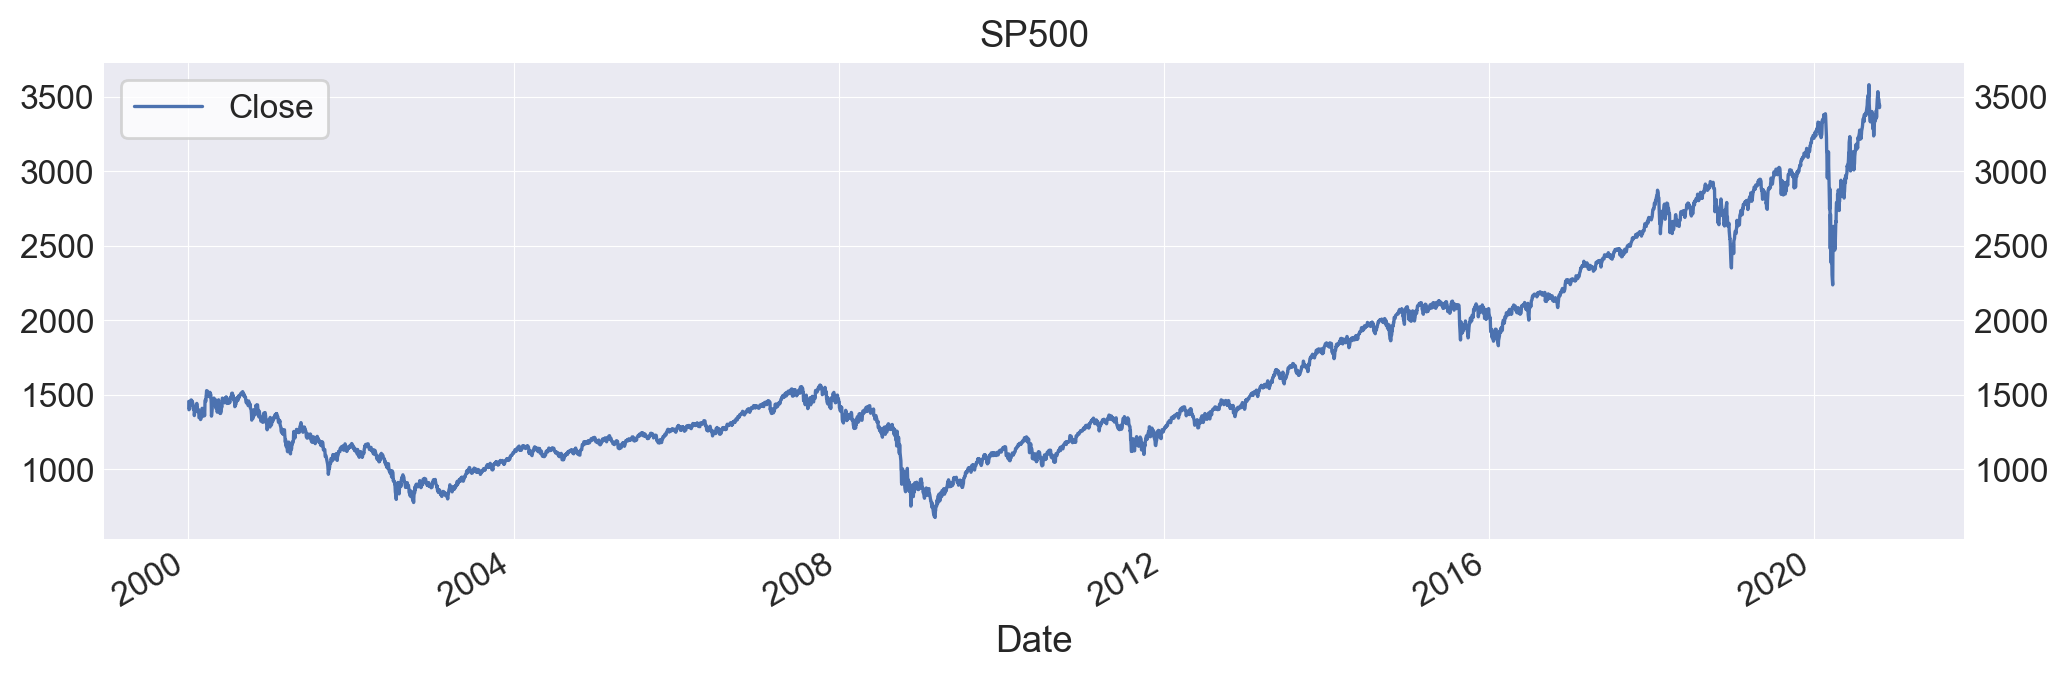

In [5]:
%run Functions.ipynb

#data = get_sp500_data(from_local_file=False, save_to_file=True)
data = get_sp500_data(from_local_file=True, save_to_file=False)
data = data[['Open', 'Close']]

data['Market_daily_ret'] = data['Close'].pct_change().fillna((data['Close']-data['Open'])/data['Open'])
data = data.loc['2000':'2020', ['Close', 'Market_daily_ret']]

data.info()
data.tail()
data['Close'].plot(title='SP500', legend=True)

## Simple backtests with and without transaction costs

The purpose of this section is to check backtests based on Moving Average crossovers. There are 3 subsections:  
- Signals on SP500. This will allow to see how MA crossovers produce buy/sell signals when different MA crossovers occur.
- Backtest without transaction costs: It allows to see how buy/sell signals affect returns from the strategy.
- Backtest with transaction costs: It allows to see the effect of transaction costs on returns from the strategy.

These are two backtests from 2018-01-01 to 2019-12-31. This first one is done without transaction costs, and the second one adds a transaction cost every time the strategy changes the position.  

Using the MAs of 75 and 200 periods, there are two crosses. On 2018-12-26 and 2019-04-24. 'Strat_position' changing at the Close of that day will cause the strategy to switch the position on the market. This change is added at the end of such days, when we would send the change of position to the broker.   

In order words, if this strategy was live trading, it uses the price a few minutes before the end of the trading day as the Close price, to take the decision about whether to change the position or not. This change in position has transaction costs, which affects the returns of such days.

In [6]:
date_fmt = '%Y-%m-%d'
first_day = datetime.strptime('2018-01-01', date_fmt)
last_day = datetime.strptime('2019-12-31', date_fmt)
fast_ma = 75
slow_ma = 200
# fast_ma = 25 # Change to this parameters to see more changes in Strat_position
# slow_ma = 40

### Signals on SP500

Close  Market_daily_ret      fast_ma      slow_ma        diff  long_signal  exit_signal
Date                                                                                                     
2018-01-02  2695.810059          0.008303  2590.054017  2483.772007  106.282010         True        False
2018-01-03  2713.060059          0.006399  2592.891751  2485.469957  107.421794        False        False
2018-01-04  2723.989990          0.004029  2595.826683  2487.369807  108.456876        False        False

Close  Market_daily_ret      fast_ma      slow_ma      diff  long_signal  exit_signal
Date                                                                                                   
2019-04-22  2907.969971          0.001012  2757.802656  2767.312898 -9.510242        False        False
2019-04-23  2933.679932          0.008841  2764.279857  2768.298247 -4.018390        False        False
2019-04-24  2927.250000         -0.002192  2769.550658  2769.135397  0.415261         True        False
2019-04-25  2926.169922         -0.000369  2774.570391  2769.845397  4.724994        False        False

<Figure size 2400x700 with 0 Axes>

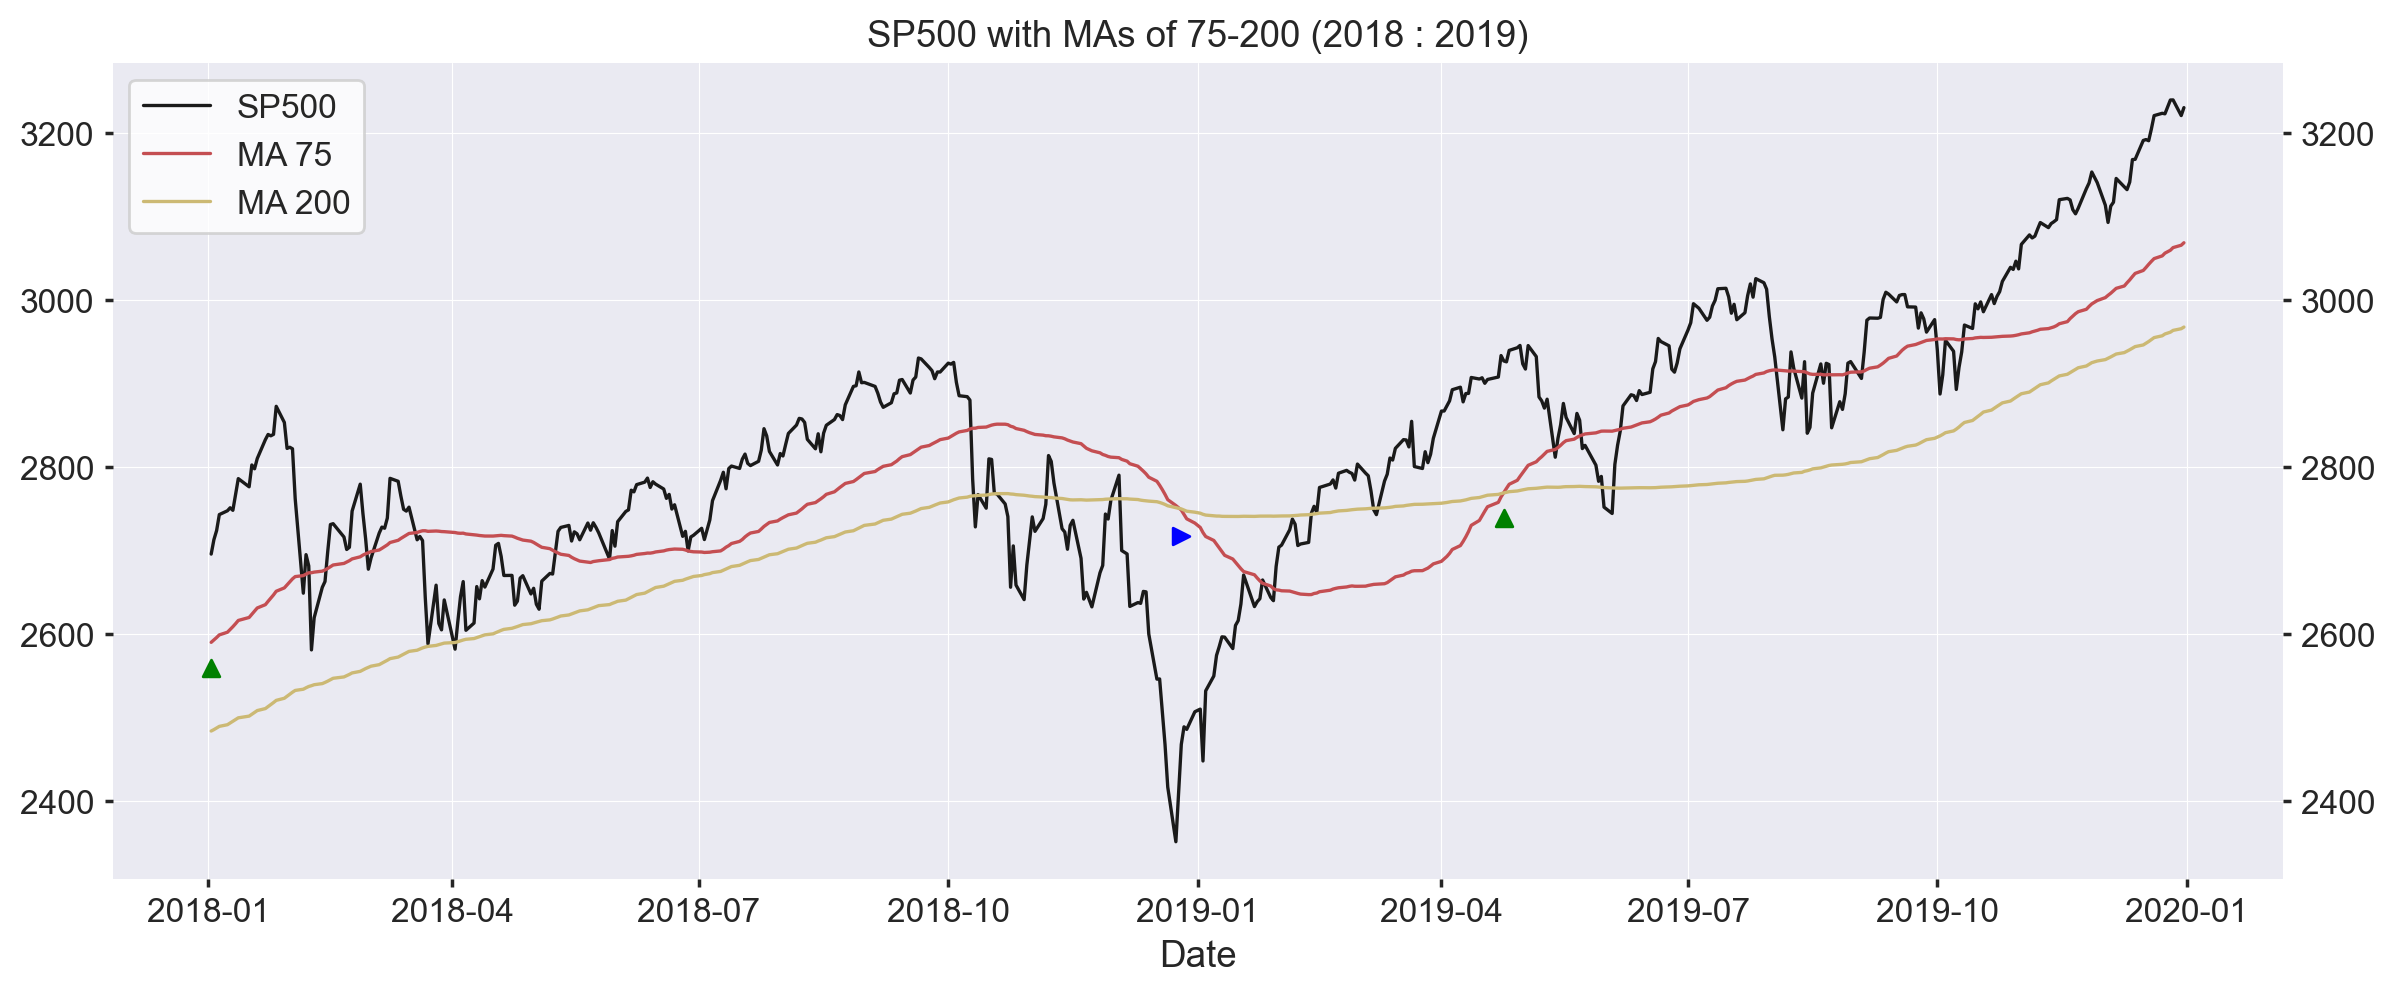

In [7]:
%run Functions.ipynb
df = data.loc[first_day:last_day].copy()

plot_sp500_with_ma_signals(df, fast_ma=fast_ma, slow_ma=slow_ma)
df.head(3)
df['2019-04-20':'2019-04-25']

### Backtest without transaction costs

This allows to test a moving average crossover strategy. Useful to see how a backtest is done and columns from the final dataframe after doing the backtest: 
 - Close: Close price of the benchmark. 
 - Market_daily_ret: daily percentage returns of the benchmark. Calculated from the previous Close price to the actual Close price. 
 - ***Strat_position***: **This is the most important column from the backtest. Daily returns, cummulative returns and costs are calculated after the strategy position is defined**. Refers to the position that we have AT THE END of such day. If the Strat_position changes from the previous day, we add transaction costs to the strategy. Calculated based on moving averages.   
 - Strat_daily_ret: daily percentage returns of the strategy. Calculated from the previous Close price to the actual Close price. 
> Strat_daily_ret = Market_daily_ret * Strat_position.shift() * (1-commission)  
> Note: commission is paid if Strat_position != Strat_position.shift()
 - Costs: Daily transaction costs in USD - . (This is the trickiest part of the whole framework. It´s easier to see the final dataframe to check that it works). Formula:
>  Costs (in USD) = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (commission)
 - Long_only: Refers to open a Buy&Hold position. This is useful for the walk-formard optimisization. It is set to 1 when B&H strategy performed better than all tested parameters In Sample.
 - Market_cum_ret: Market cummulative returns. This is proportional to the Close price of the benchmark, starting at a price of initial_equity
> If initial_equity is set to the initial price of the benchmark, Market_cum_ret = Close
 - Strat_cum_ret: Strategy cummulative return. Built from 'Strat_daily_ret' and starting with a price of initial_equity.
> Strat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)

In [17]:
loc = data.index.get_loc(df.index[0])
ini_money = data.iloc[loc - 1]['Close'] # We assume we can buy at the Close of the previous day to the start of the backtest
#ini_money = 100
previous_position = 1

fast_ma = 75
slow_ma = 200
strategy = ma_crossover(df, fast_ma, slow_ma)

Backtest without transaction costs: 
ini_money = 2673.61
Strategy: ma_crossover(75-200)
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. IR of SP500: 0.67
	Overall return of strategy: 101.87 %. IR strategy: 0.07

First three days: 
	We can see how we had entered the market before the first day (because previous_position=1).
	And since costs = 0:
	On 2018-01-03, Strat_cum_ret = 2695.810059 * [1+[0.006399*1.0]] = 2713.060059


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303         0.008303             1.0    0.0        0.0     2695.810059    2695.810059
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0        0.0     2713.060059    2713.060059
2018-01-04  2723.989990          0.004029         0.004029             1.0    0.0        0.0     2723.989990    2723.989990


At the end of 2018-12-26 there is a change of Strat_position from 1.0 to 0.0: 
	And since costs = 0:
	On 2018-12-26, Strat_cum_ret = 2351.100098 * [1+[0.049594*1.0]] * [1-Costs] = 2467.699951  (Closing the position didn´t cost us anything)
	On 2018-12-27, Strat_cum_ret = 2467.699951 * [1+[0.008563*0.0]] = 2467.699951


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-12-21  2416.620117         -0.020588        -0.020588             1.0    0.0        0.0     2416.620117    2416.620117
2018-12-24  2351.100098         -0.027112        -0.027112             1.0    0.0        0.0     2351.100098    2351.100098
2018-12-26  2467.699951          0.049594         0.049594             0.0    0.0        0.0     2467.699951    2467.699951
2018-12-27  2488.830078          0.008563         0.000000             0.0    0.0        0.0     2488.830078    2467.699951


At the end of 2019-04-24 there is a change of Strat_position from 0.0 to 1.0: 
	And since costs = 0:
	On 2019-04-24, Strat_cum_ret = 2467.699951 * [1+[-0.002192*0.0]] * [1-Costs] = 2467.699951  (Opening a position didn´t cost us anything)
	On 2019-04-25, Strat_cum_ret = 2467.699951 * [1+[-0.000369*1.0]] = 2466.789435


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2019-04-22  2907.969971          0.001012         0.000000             0.0    0.0        0.0     2907.969971    2467.699951
2019-04-23  2933.679932          0.008841         0.000000             0.0    0.0        0.0     2933.679932    2467.699951
2019-04-24  2927.250000         -0.002192         0.000000             1.0    0.0        0.0     2927.250000    2467.699951
2019-04-25  2926.169922         -0.000369        -0.000369             1.0    0.0        0.0     2926.169922    2466.789435

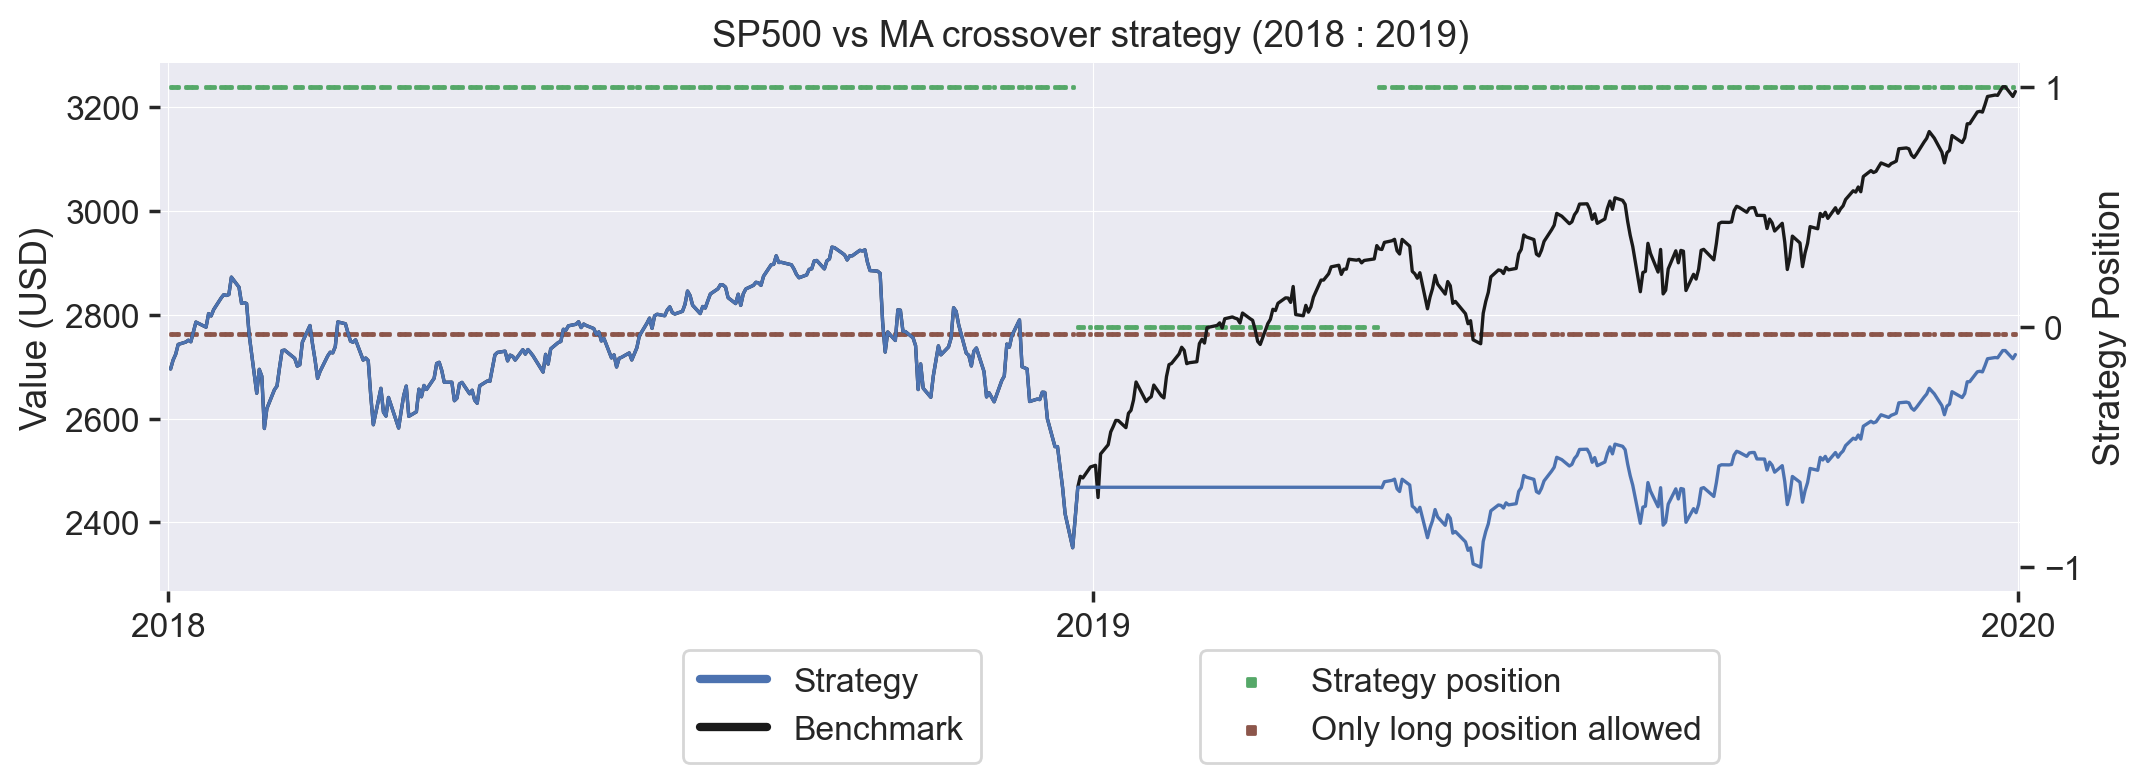

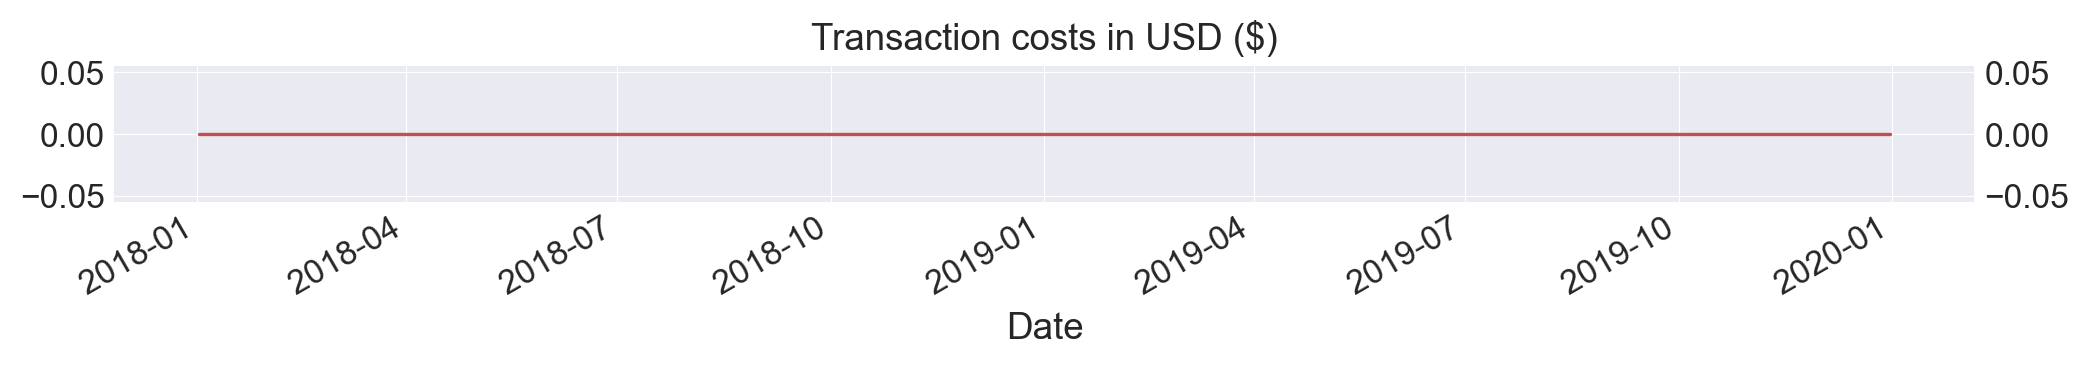

In [18]:
%run Functions.ipynb
df = data[first_day:last_day].copy()

print("Backtest without transaction costs: \nini_money = {:.2f}".format(ini_money))

df = backtest_print_plot(df, strategy, strat_params=(fast_ma, slow_ma),
                         previous_position=previous_position, 
                         ini_equity=ini_money, commision=0, with_legend=True)

print("\nFirst three days: \n\tWe can see how we had entered the market before the first day (because previous_position=1).\n\t"
        "And since costs = 0:\n\t"
        "On 2018-01-03, Strat_cum_ret = 2695.810059 * [1+[0.006399*1.0]] = 2713.060059")
display(df.head(3))

print("\nAt the end of 2018-12-26 there is a change of Strat_position from 1.0 to 0.0: \n\t"
        "And since costs = 0:\n\t"
        "On 2018-12-26, Strat_cum_ret = 2351.100098 * [1+[0.049594*1.0]] * [1-Costs] = 2467.699951  (Closing the position didn´t cost us anything)\n\t"  
        "On 2018-12-27, Strat_cum_ret = 2467.699951 * [1+[0.008563*0.0]] = 2467.699951")
display(df.loc['2018-12-21':'2018-12-27']) # Change of Strat_position from 1 to 0

print("\nAt the end of 2019-04-24 there is a change of Strat_position from 0.0 to 1.0: \n\t"
        "And since costs = 0:\n\t"
        "On 2019-04-24, Strat_cum_ret = 2467.699951 * [1+[-0.002192*0.0]] * [1-Costs] = 2467.699951  (Opening a position didn´t cost us anything)\n\t"  
        "On 2019-04-25, Strat_cum_ret = 2467.699951 * [1+[-0.000369*1.0]] = 2466.789435")
display(df.loc['2019-04-22':'2019-04-25']) # Change of Strat_position from 0 to 1

plt.show()
df['Costs'].plot(title='Transaction costs in USD ($)', figsize=(12,1), color='r');

### With transaction costs

We test how a transaction costs on the backtest affects 'Costs', and therefore, 'Strat_daily_ret' and 'Strat_cum_ret'. We can see change in 'Strat_position' on 2018-12-26 and 2019-04-24. <br><br>
We can also see how previous_position has an effect on the 'Costs' of the first day. previous_position refers to the position that we had in the market on the previous day to the start of the strategy. This parameter is set to 0 by default, and it will be useful for the walk-forward optimization, in which we may end a period_t adn strat a period_t+1 being long on the market, which would safe us transaction costs from selling and buying.<br><br>

A very high commision of 0.50 (50% of the actual equity for entering a position) shows well how transaction costs work in the backtest. Two aspects are worth being checked in this specific test:
- We can see how we loose 50% of the capital on the days that we change the position on the market (2018-12-26 and 2019-04-24). 
- The only difference between first and second backtest is the _previous_position_ parameter. 
    1. In the first backtest we are initially with previous_position=0, which means that we are out of the market. Since our strategy tells us to enter the market from the first day, we have to pay a transaction costs of 50% of our capital, and we can see that reflected on 'Costs', 'Strat_daily_ret', and 'Strat_cum_ret'.
    2. In the second backtest we are initially with previous_position=1, which means that we have a buy position in the market. Since our strategy tells us to keep long in the market from the first day, we don´t have to pay a transaction costs. We can see the difference with the previous case on 'Costs', 'Strat_daily_ret', and 'Strat_cum_ret'.

In [19]:
loc = data.index.get_loc(df.index[0])
#ini_money = data.iloc[loc - 1]['Close'] # We assume we can buy at the Close of the previous day to the start of the backtest
ini_money = 100 # So its easier to calculate transaction costs
commision = 0.5
#previous_position = 1

fast_ma = 75
slow_ma = 200
strategy = ma_crossover(df, fast_ma, slow_ma)

Backtest with transaction costs and previous position in the market = 0: 
ini_money = 100.00
		Strat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)
Strategy: ma_crossover(75-200)
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. IR of SP500: 0.67
	Overall return of strategy: 12.73 %. IR strategy: -1.05


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303        -0.495848             1.0   50.0        0.0      100.830336      50.415168
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0        0.0      101.475531      50.737766
2018-01-04  2723.989990          0.004029         0.004029             1.0    0.0        0.0      101.884339      50.942170

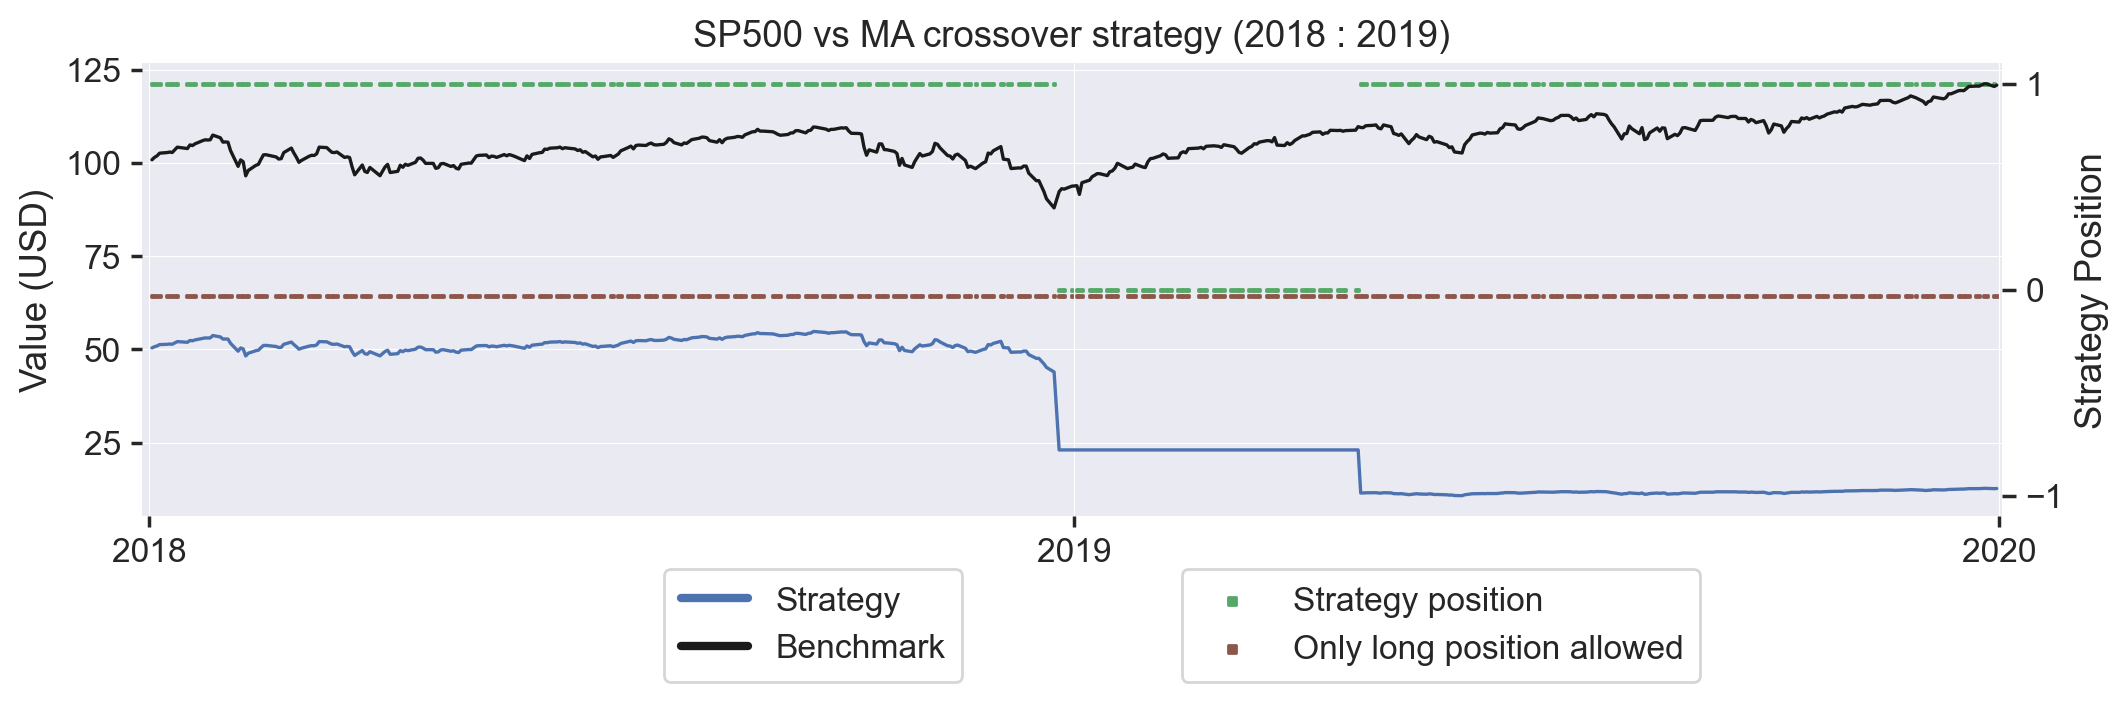

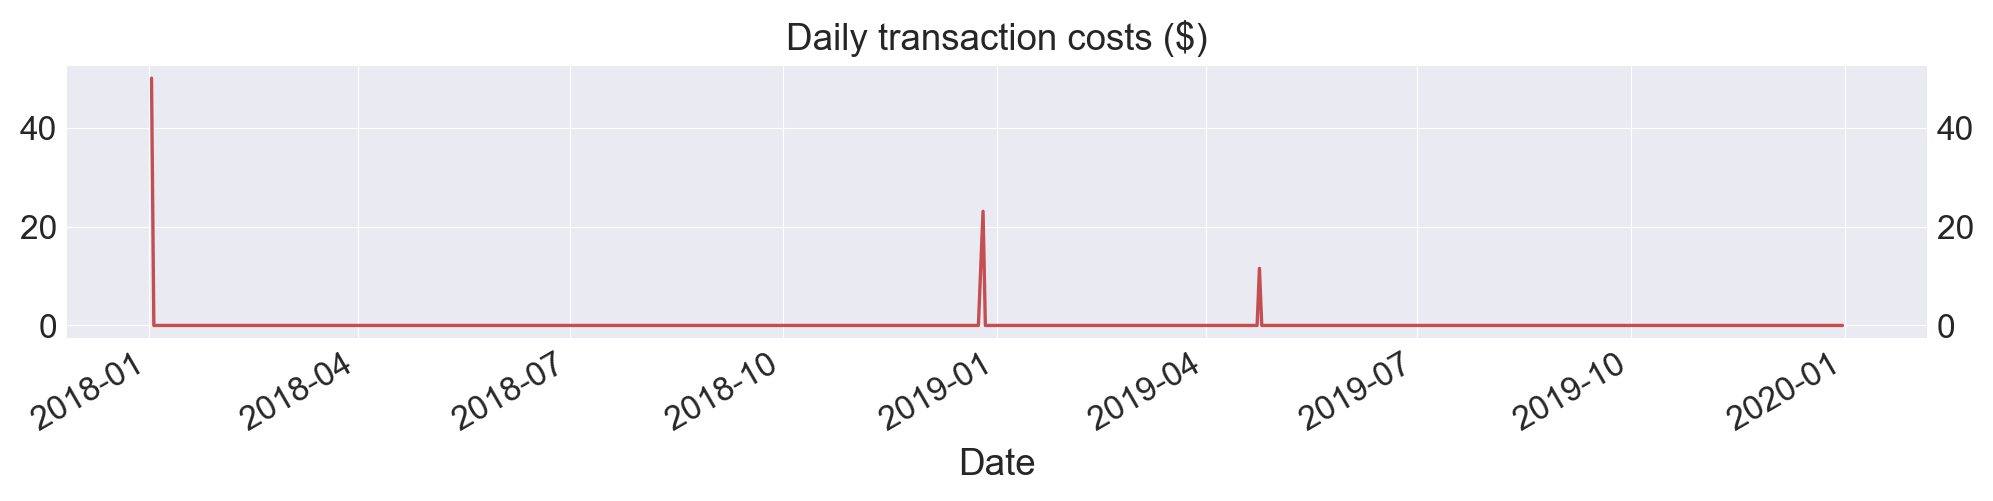

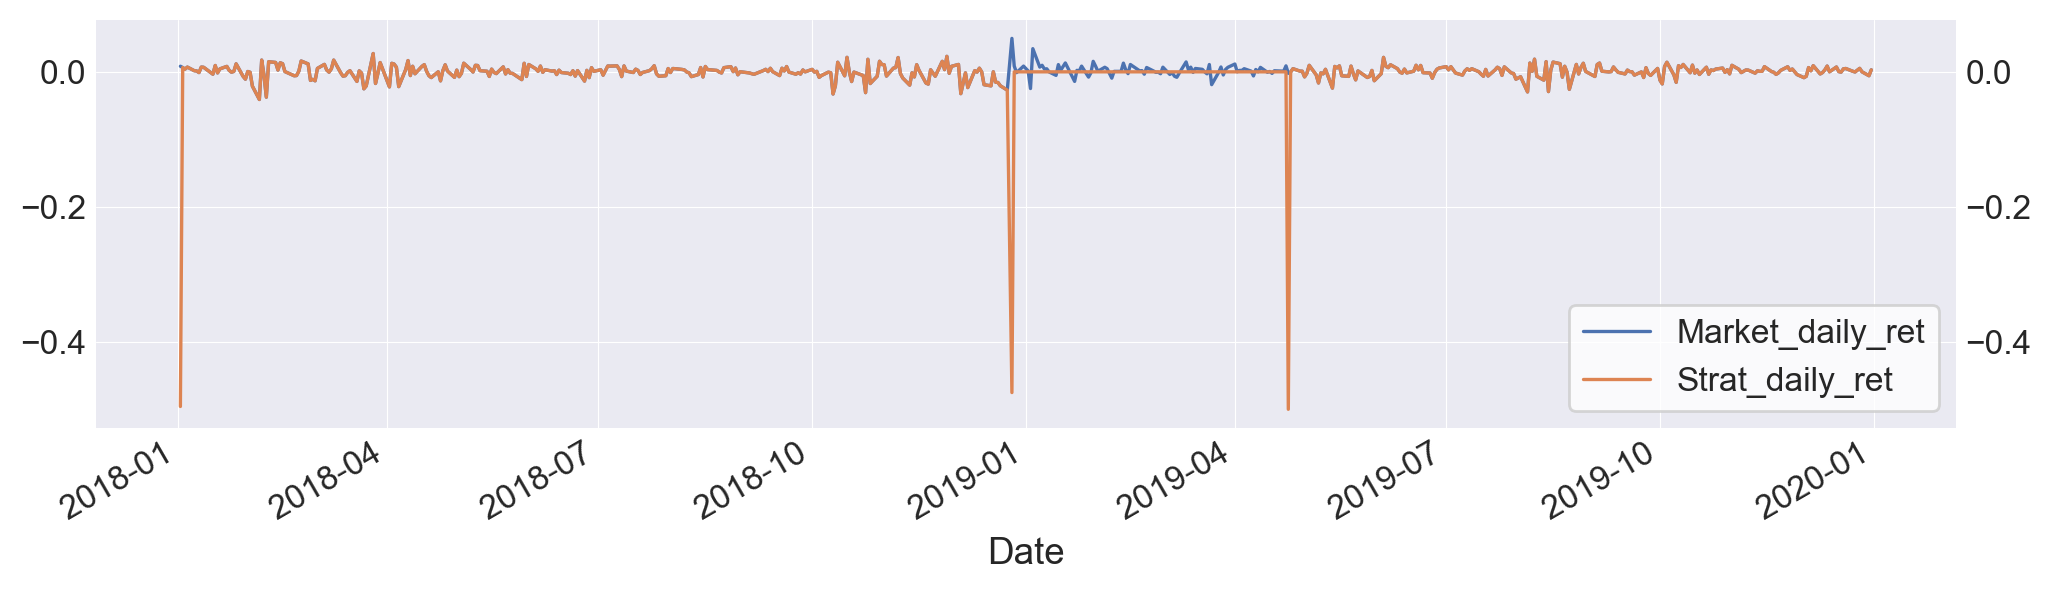

Backtest with transaction costs and previous position in the market = 1: 
ini_money = 100.00
Strategy: ma_crossover(75-200)
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. IR of SP500: 0.67
	Overall return of strategy: 25.47 %. IR strategy: -0.98


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303         0.008303             1.0    0.0        0.0      100.830336     100.830336
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0        0.0      101.475531     101.475531
2018-01-04  2723.989990          0.004029         0.004029             1.0    0.0        0.0      101.884339     101.884339

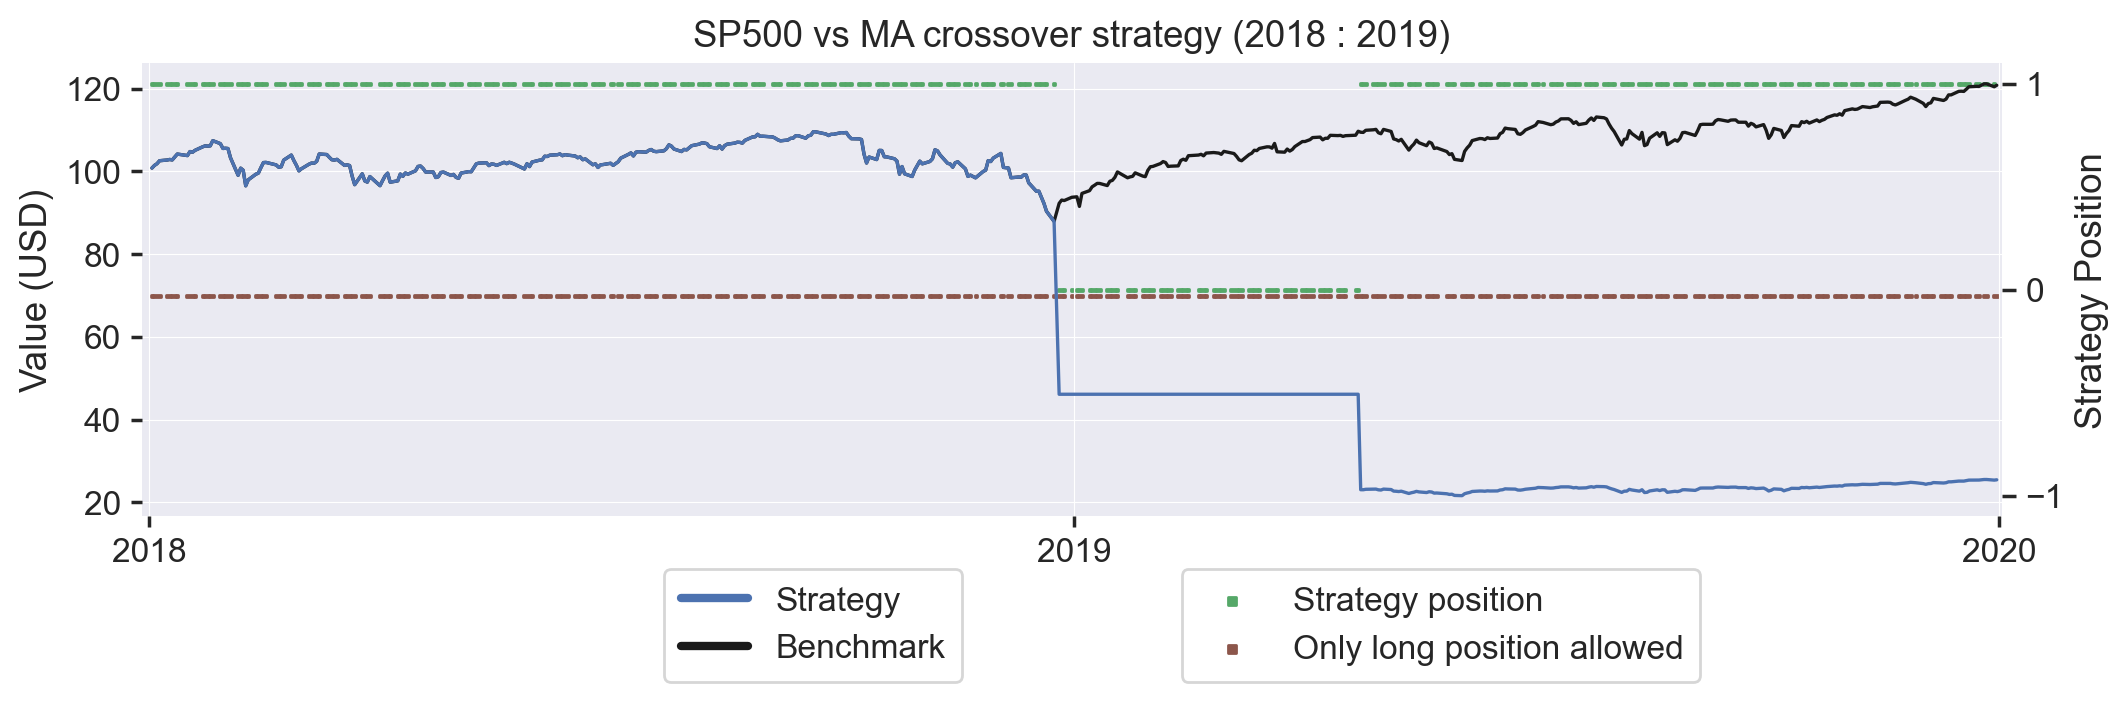

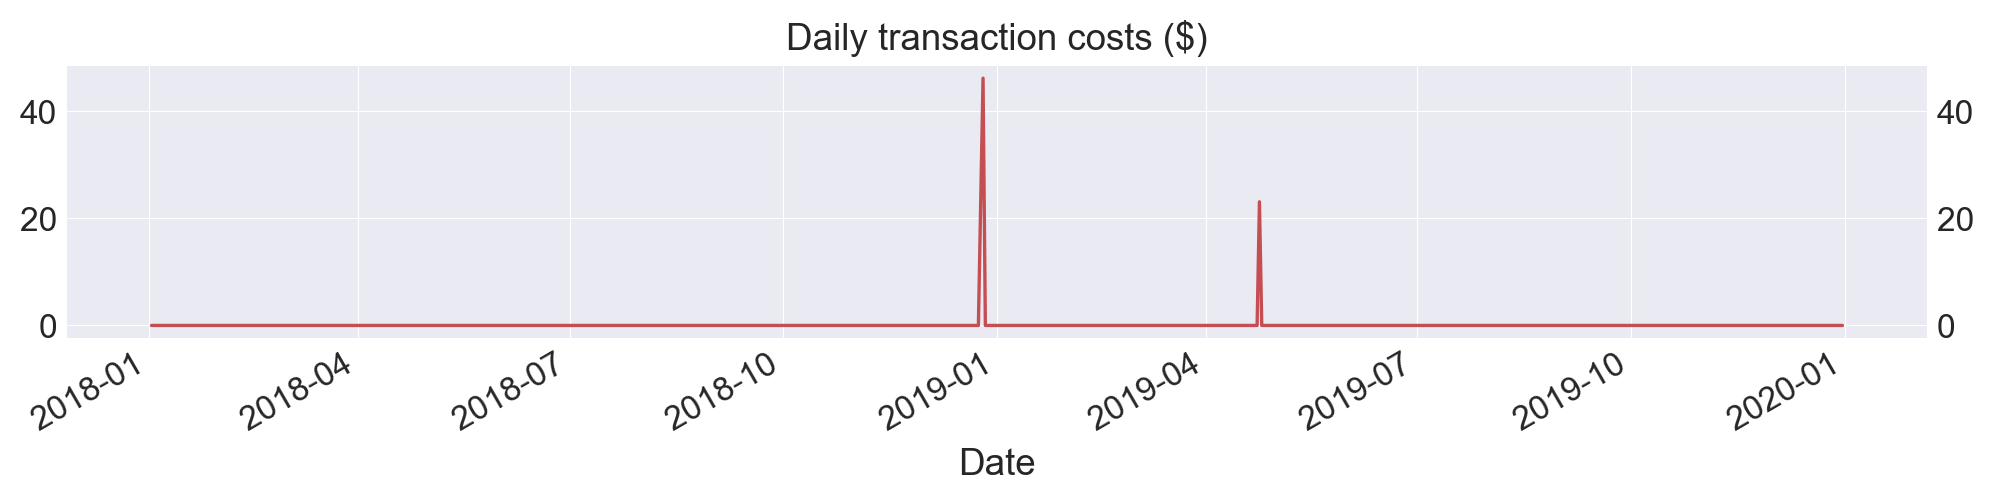

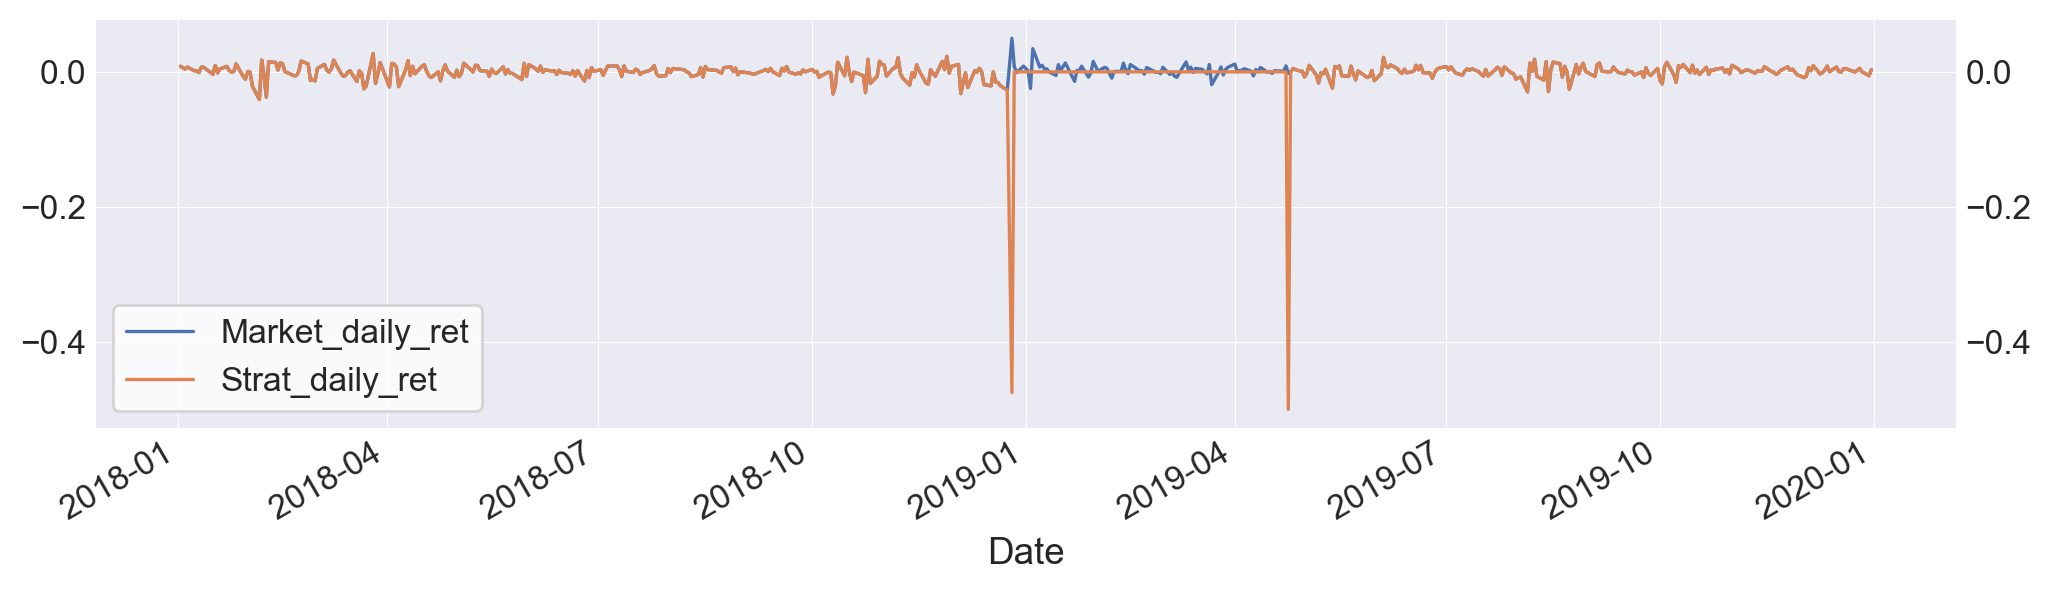

In [22]:
%run Functions.ipynb
df = data[first_day:last_day].copy()

print("Backtest with transaction costs and previous position in the market = 0: \nini_money = {:.2f}".format(ini_money))
print("\t\tStrat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)")
df = backtest_print_plot(df, strategy, strat_params=(fast_ma, slow_ma),
                         previous_position=0, ini_equity=ini_money, commision=commision, 
                         figsize=(12,3), with_legend=True)
display(df.head(3))
plt.show()
_ = df['Costs'].plot(title='Daily transaction costs ($)', figsize=(12,2), color='r')
plt.show()

df[['Market_daily_ret', 'Strat_daily_ret']].plot(figsize=(12,3))
plt.show()

print("Backtest with transaction costs and previous position in the market = 1: \nini_money = {:.2f}".format(ini_money))
df = backtest_print_plot(df, strategy, strat_params=(fast_ma, slow_ma),
                         previous_position=1, ini_equity=ini_money, commision=commision, 
                         figsize=(12,3), with_legend=True)
display(df.head(3))
plt.show()
_ = df['Costs'].plot(title='Daily transaction costs ($)', figsize=(12,2), color='r')
plt.show()

df[['Market_daily_ret', 'Strat_daily_ret']].plot(figsize=(12,3));

#df.iloc[[0,1,2,-2,-1]]
# df.loc['2018-12-21':'2018-12-27']
# df.loc['2019-04-22':'2019-04-25']

### One more example with transaction costs

More realistic commision, but still big (and visible in the plot): 1%

In [24]:
loc = data.index.get_loc(df.index[0])
ini_money = data.iloc[loc - 1]['Close'] # We assume we can buy at the Close of the previous day to the start of the backtest
#ini_money = 100
commision = 0.01
previous_position = 1

strategy = ma_crossover(df, fast_ma, slow_ma)

Backtest with transaction costs: 
ini_money = 2673.61
		Strat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)
Strategy: ma_crossover(75-200)
Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: 120.84 %. IR of SP500: 0.67
	Overall return of strategy: 99.84 %. IR strategy: -0.01

First three days: 
	We can see how we had entered the market before the first day (because previous_position=1).
	And since costs = 0:
	On 2018-01-03, Strat_cum_ret = 2695.810059 * [1+[0.006399*1.0]] = 2713.060059


Close  Market_daily_ret  Strat_daily_ret  Strat_position  Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                       
2018-01-02  2695.810059          0.008303         0.008303             1.0    0.0        0.0     2695.810059    2695.810059
2018-01-03  2713.060059          0.006399         0.006399             1.0    0.0        0.0     2713.060059    2713.060059
2018-01-04  2723.989990          0.004029         0.004029             1.0    0.0        0.0     2723.989990    2723.989990


At the end of 2018-12-26 there is a change of Strat_position from 1.0 to 0.0: 
	And since costs = 0:
	On 2018-12-26, Strat_cum_ret = 2351.100098 * [1+[0.049594*1.0]] * [1-0.01] = 2443.022952  (Closing the position cost us 1% of the equity at the end of 2018-12-26)
				Costs = 2351.100098 * [1+[0.049594*1.0]] * [0.01] = 24.677
	On 2018-12-27, Strat_cum_ret = 2443.022952 * [1+[0.008563*0.0]] = 2443.022952


Close  Market_daily_ret  Strat_daily_ret  Strat_position   Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                        
2018-12-21  2416.620117         -0.020588        -0.020588             1.0   0.000        0.0     2416.620117    2416.620117
2018-12-24  2351.100098         -0.027112        -0.027112             1.0   0.000        0.0     2351.100098    2351.100098
2018-12-26  2467.699951          0.049594         0.039098             0.0  24.677        0.0     2467.699951    2443.022952
2018-12-27  2488.830078          0.008563         0.000000             0.0   0.000        0.0     2488.830078    2443.022952


At the end of 2019-04-24 there is a change of Strat_position from 0.0 to 1.0: 
	And since commission = 0.01:
	On 2019-04-24, Strat_cum_ret = 2467.699951 * [1+[-0.002192*0.0]] * [1-Costs] = 2443.022952  (Opening the position cost us 1% of the equity at the end of 2019-04-24)
	On 2019-04-25, Strat_cum_ret = 2443.022952 * [1+[-0.000369*1.0]] = 2443.022952


Close  Market_daily_ret  Strat_daily_ret  Strat_position     Costs  Long_only  Market_cum_ret  Strat_cum_ret
Date                                                                                                                          
2019-04-22  2907.969971          0.001012         0.000000             0.0   0.00000        0.0     2907.969971    2443.022952
2019-04-23  2933.679932          0.008841         0.000000             0.0   0.00000        0.0     2933.679932    2443.022952
2019-04-24  2927.250000         -0.002192        -0.010000             1.0  24.43023        0.0     2927.250000    2418.592722
2019-04-25  2926.169922         -0.000369        -0.000369             1.0   0.00000        0.0     2926.169922    2417.700325

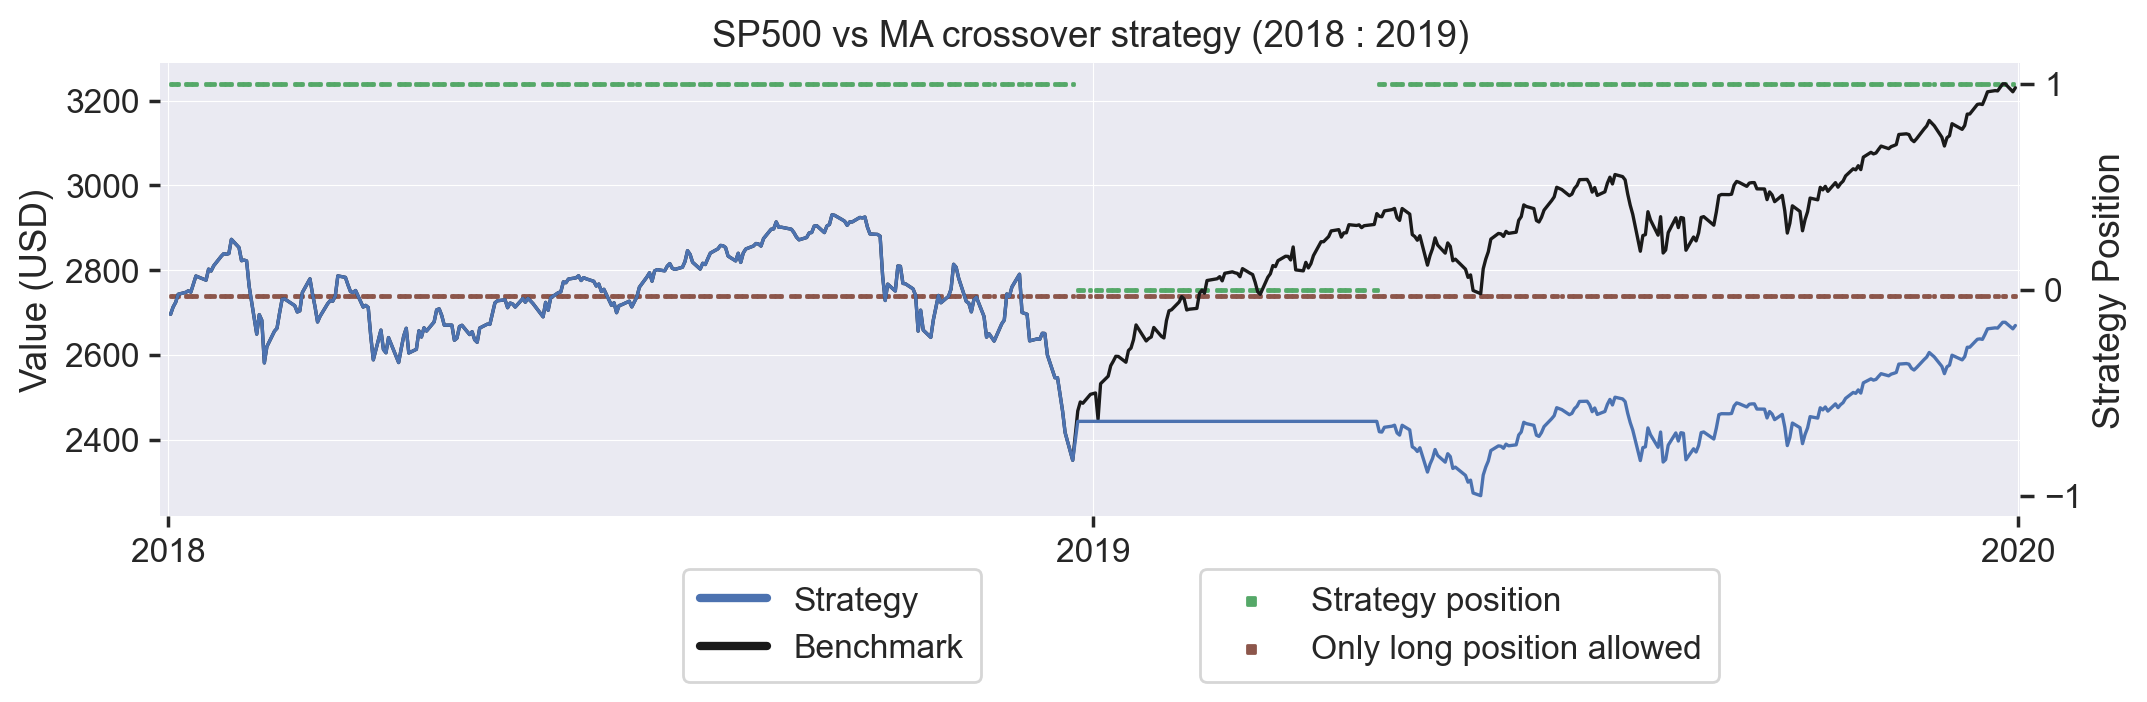

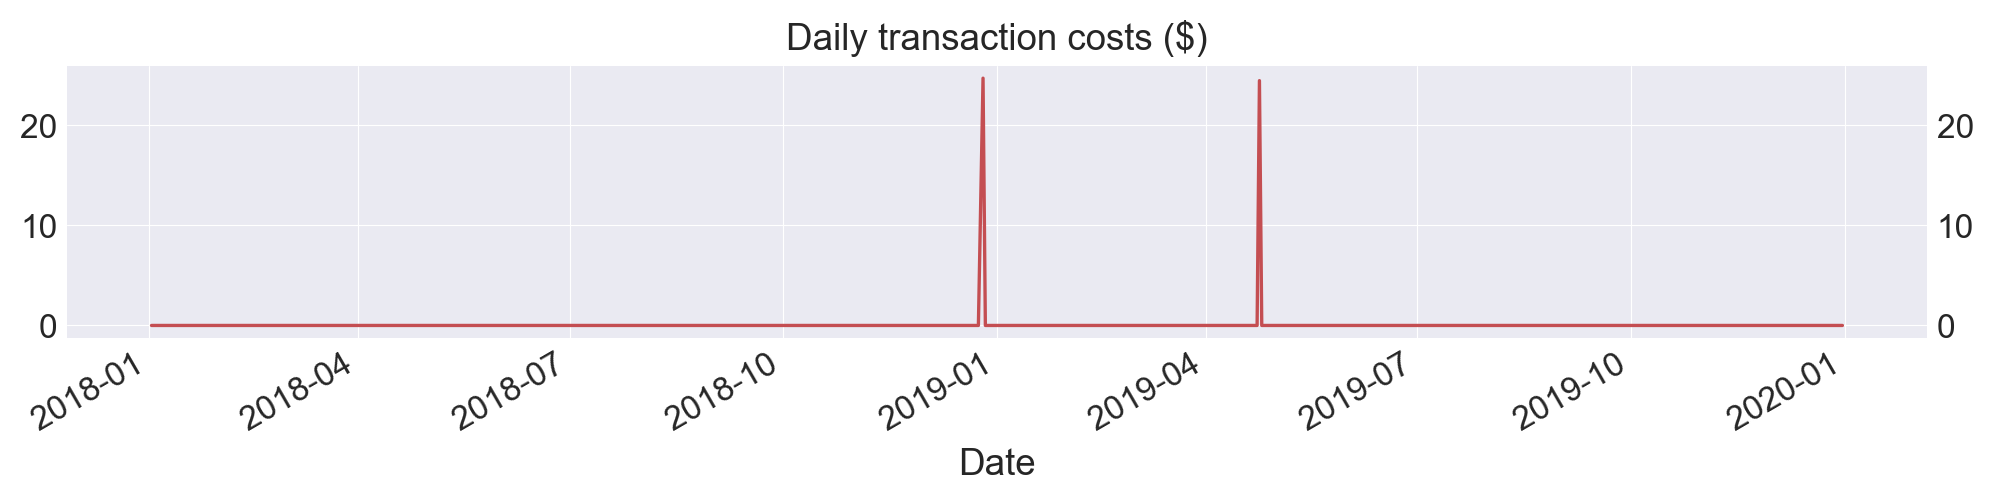

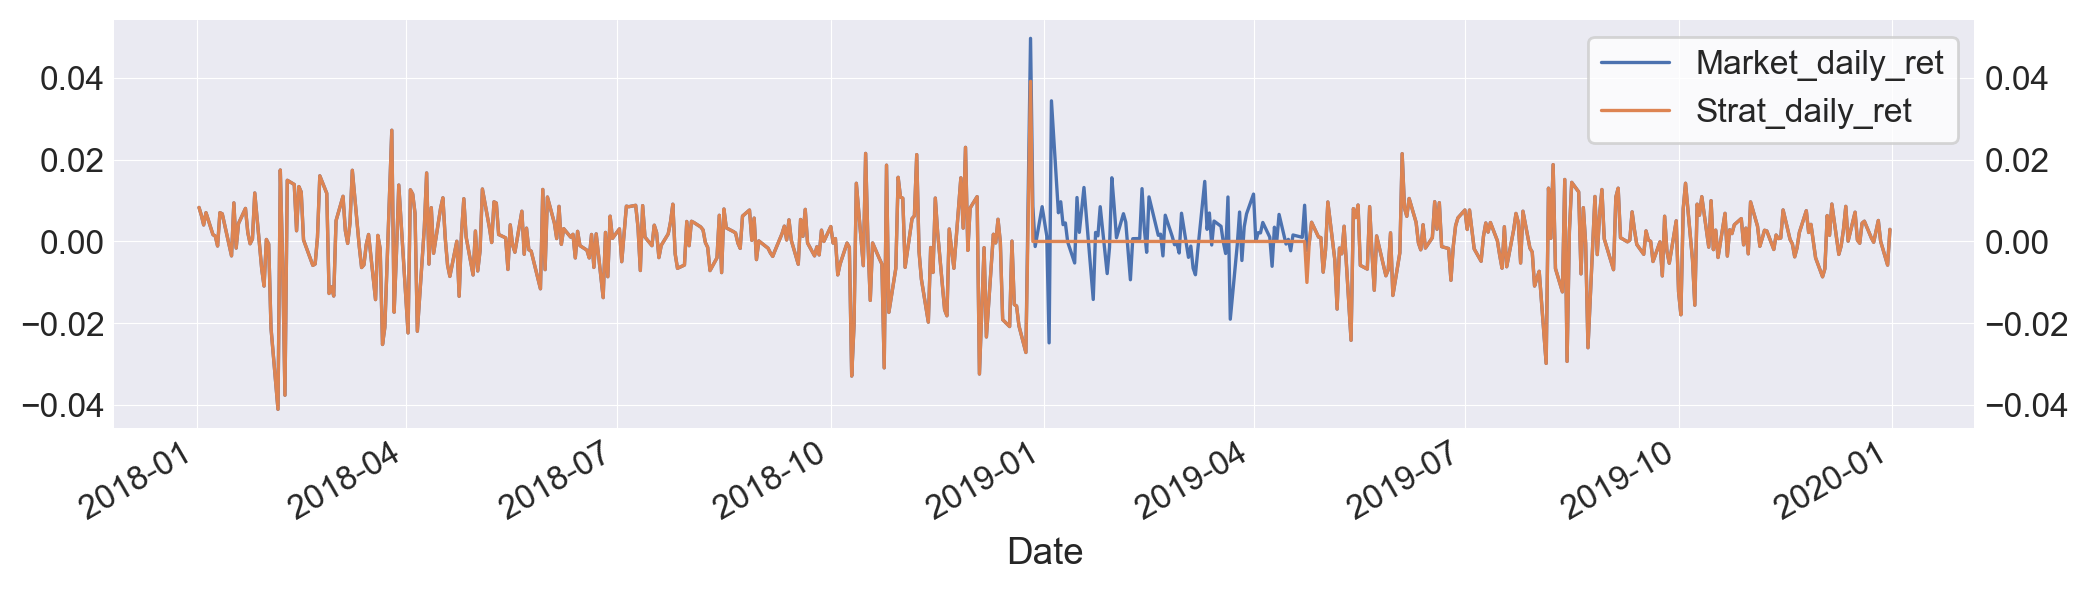

In [25]:
%run Functions.ipynb
df = data[first_day:last_day].copy()

print("Backtest with transaction costs: \nini_money = {:.2f}".format(ini_money))
print("\t\tStrat_cum_ret = Strat_cum_ret.shift() * [1+[Market_Daily_ret*Strat_position.shift()]] * (1-commission)")

df = backtest_print_plot(df, strategy, strat_params=(fast_ma, slow_ma),
                         previous_position=previous_position, ini_equity=ini_money, commision=commision, 
                         figsize=(12,3), with_legend=True)

print("\nFirst three days: \n\tWe can see how we had entered the market before the first day (because previous_position=1).\n\t"
        "And since costs = 0:\n\t"
        "On 2018-01-03, Strat_cum_ret = 2695.810059 * [1+[0.006399*1.0]] = 2713.060059")
display(df.head(3))

print("\nAt the end of 2018-12-26 there is a change of Strat_position from 1.0 to 0.0: \n\t"
        "And since costs = 0:\n\t"
        "On 2018-12-26, Strat_cum_ret = 2351.100098 * [1+[0.049594*1.0]] * [1-0.01] = 2443.022952  (Closing the position cost us 1% of the equity at the end of 2018-12-26)\n\t"  
                          "\t\t\tCosts = 2351.100098 * [1+[0.049594*1.0]] * [0.01] = 24.677\n\t"
          "On 2018-12-27, Strat_cum_ret = 2443.022952 * [1+[0.008563*0.0]] = 2443.022952")
display(df.loc['2018-12-21':'2018-12-27']) # Change of Strat_position from 1 to 0

print("\nAt the end of 2019-04-24 there is a change of Strat_position from 0.0 to 1.0: \n\t"
        "And since commission = 0.01:\n\t"
        "On 2019-04-24, Strat_cum_ret = 2467.699951 * [1+[-0.002192*0.0]] * [1-Costs] = 2443.022952  (Opening the position cost us 1% of the equity at the end of 2019-04-24)\n\t"  
        "On 2019-04-25, Strat_cum_ret = 2443.022952 * [1+[-0.000369*1.0]] = 2443.022952")
display(df.loc['2019-04-22':'2019-04-25']) # Change of Strat_position from 0 to 1

plt.show();

_ = df['Costs'].plot(title='Daily transaction costs ($)', figsize=(12,2), color='r');
#_ = df['Costs_in_pct'].mul(df['Strat_cum_ret']).plot(title='Daily transaction costs (%)', figsize=(12,2), color='r')
plt.show();
df[['Market_daily_ret', 'Strat_daily_ret']].plot(figsize=(12,3));
plt.show();

# df.iloc[[0,1,2,-2,-1]]
# df.loc['2018-12-21':'2018-12-27']

## Performance metrics

In [26]:
metrics = calculate_performance_metrics(df, strat_name='MA Crossover')
metrics

AbsRet     ARC      IR      aSD       MD      AMD     MLD  All Risk   ARCMD  ARCAMD  Num Trades  No signal
MA Crossover  -0.1582 -0.0793 -0.0057  13.9273  22.6288  13.4803  1.2758     0.542 -0.0035 -0.0059           3         81
Buy and Hold  20.8396  9.9478  0.6653  14.9513  19.7782  13.3072  0.5859     0.542 -0.0035 -0.0059           1          0